# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [23]:
#import requests

#weather_api_key = "keyremoved"  # Replace with the new API key
#url = f"http://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}"

#response = requests.get(url)
#print(response.json())

#I used this to see when my api key is activated i kept on getting error401 (mentioned in README)


{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.88, 'feels_like': 284.41, 'temp_min': 283.72, 'temp_max': 285.51, 'pressure': 991, 'humidity': 88, 'sea_level': 991, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 304, 'gust': 6.71}, 'clouds': {'all': 100}, 'dt': 1727405754, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1727416504, 'sunset': 1727459258}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [24]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch the JSON data for the weather in the city
        city_weather = requests.get(city_url).json()

        # If the city is found, retrieve weather data
        if city_weather['cod'] == 200:
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the city information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            print(f"City {city} not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found. Skipping... Exception: {e}")

    # Pause to avoid hitting API rate limits
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the City Data Frame
city_data_df.head()


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | baise city
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | colonia
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | saint joseph
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | kataragama
City kataragama not found. Skipping...
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | mili
Processing Record 17 of Set 1 | wuhai
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | galliano
Processing Record 21 of Set 1 | mejit
Processing Record

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,6.07,99,99,4.72,RU,1727406119
1,baise city,23.8997,106.6133,30.19,99,69,1.45,CN,1727406120
2,port-aux-francais,-49.3500,70.2167,3.99,82,100,17.00,TF,1727406122
3,colonia,50.9333,6.9500,14.42,73,0,3.60,DE,1727406008
4,grytviken,-54.2811,-36.5092,-1.37,76,59,8.13,GS,1727406124


In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,6.07,99,99,4.72,RU,1727406119
1,baise city,23.8997,106.6133,30.19,99,69,1.45,CN,1727406120
2,port-aux-francais,-49.3500,70.2167,3.99,82,100,17.00,TF,1727406122
3,colonia,50.9333,6.9500,14.42,73,0,3.60,DE,1727406008
4,grytviken,-54.2811,-36.5092,-1.37,76,59,8.13,GS,1727406124


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,6.07,99,99,4.72,RU,1727406119
1,baise city,23.8997,106.6133,30.19,99,69,1.45,CN,1727406120
2,port-aux-francais,-49.3500,70.2167,3.99,82,100,17.00,TF,1727406122
3,colonia,50.9333,6.9500,14.42,73,0,3.60,DE,1727406008
4,grytviken,-54.2811,-36.5092,-1.37,76,59,8.13,GS,1727406124


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

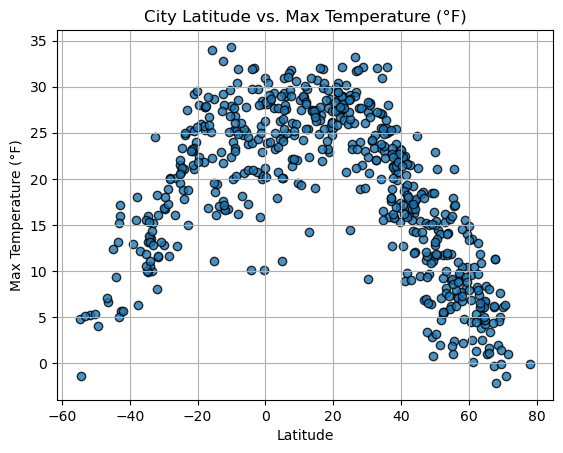

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

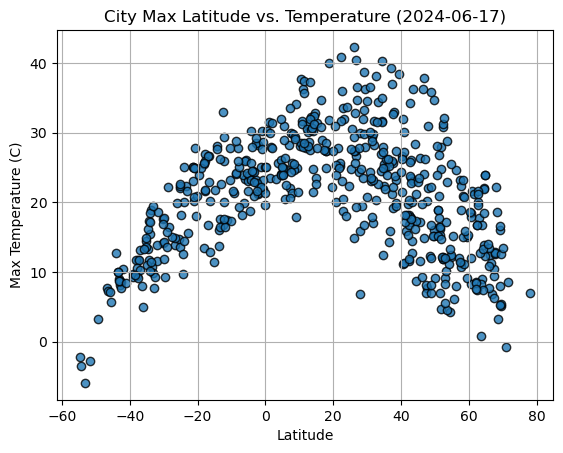

In [8]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

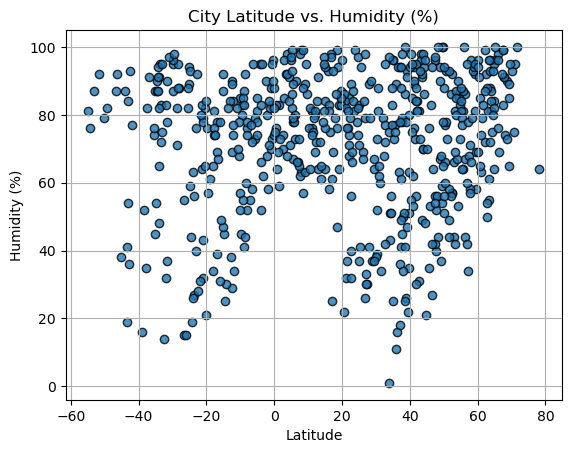

In [30]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


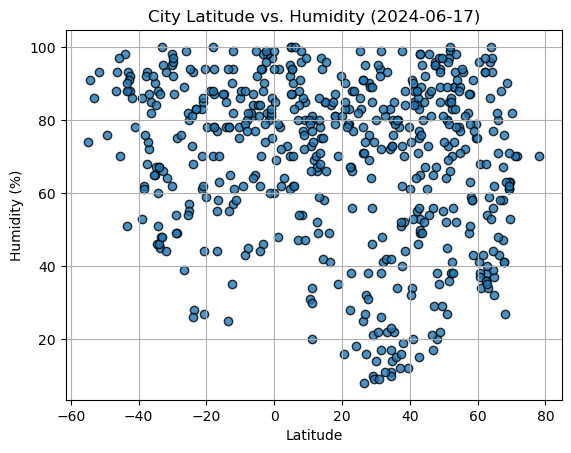

In [9]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

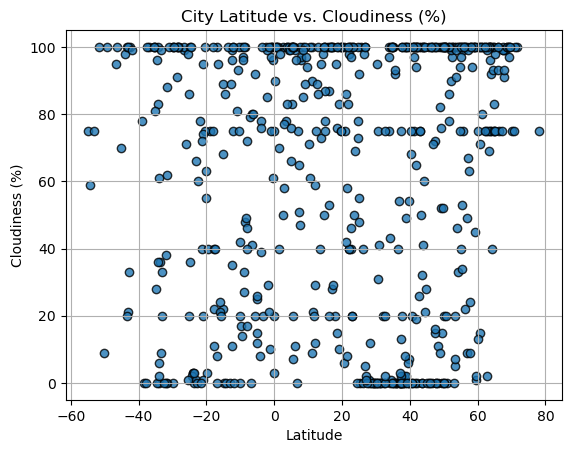

In [31]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


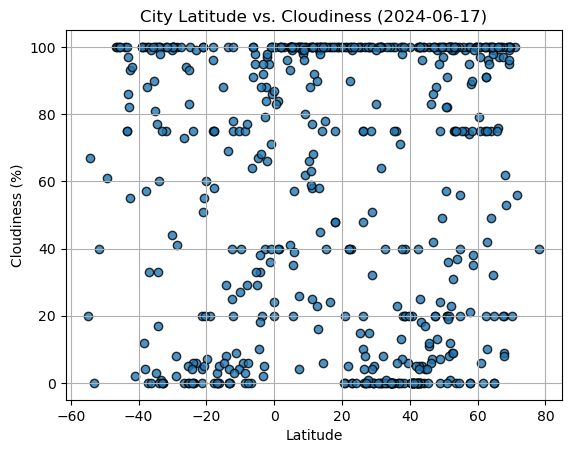

In [10]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

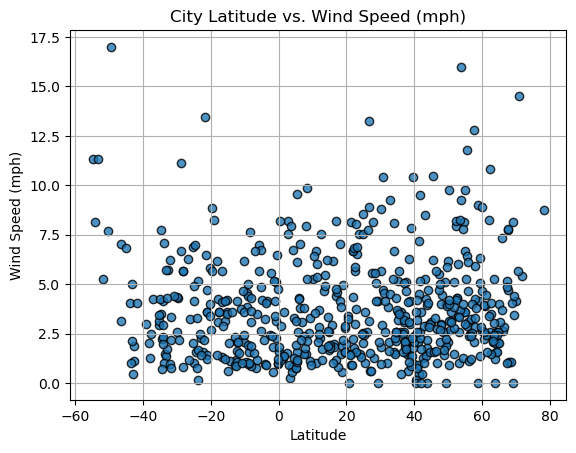

In [32]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


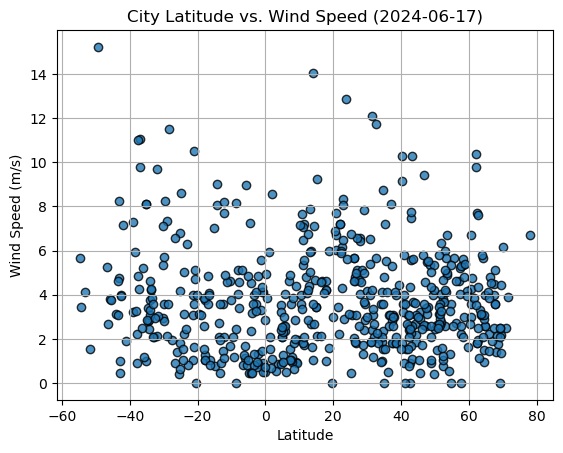

In [11]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Import necessary library
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    
    # Add labels, title, and grid
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Display the r-squared value on the plot
    plt.annotate(f'R-squared = {rvalue**2:.2f}', xy=(min(x_values), max(y_values)), fontsize=12, color="red")
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()




In [12]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Define a function to create Linear Regression plots
# YOUR CODE HERE

In [38]:
 # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,6.07,99,99,4.72,RU,1727406119
1,baise city,23.8997,106.6133,30.19,99,69,1.45,CN,1727406120
3,colonia,50.9333,6.9500,14.42,73,0,3.60,DE,1727406008
5,saint joseph,39.7686,-94.8466,16.79,80,0,1.78,US,1727406022
7,yellowknife,62.4560,-114.3525,8.29,92,75,2.57,CA,1727406080


In [13]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,3.99,82,100,17.00,TF,1727406122
4,grytviken,-54.2811,-36.5092,-1.37,76,59,8.13,GS,1727406124
6,ushuaia,-54.8000,-68.3000,4.81,81,75,11.32,AR,1727405856
8,waitangi,-43.9535,-176.5597,9.34,87,98,4.02,NZ,1727406128
9,invercargill,-46.4000,168.3500,6.68,92,100,3.13,NZ,1727406129


In [14]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.70


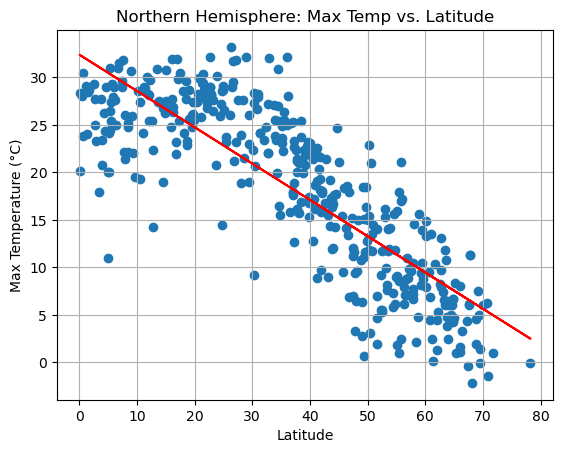

In [40]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Temperature vs Latitude for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Get the linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot scatter and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, -20), fontsize=15, color="red")

# Add labels, title, and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere: Max Temp vs. Latitude")
plt.grid()

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Show the plot
plt.show()


The r^2-value is: 0.3940754297489331


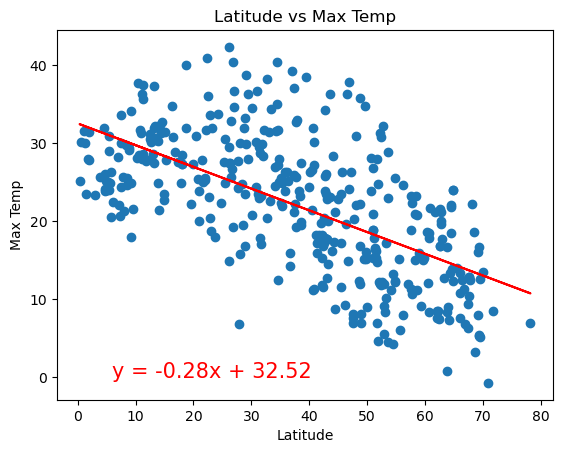

In [15]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-squared is: 0.53


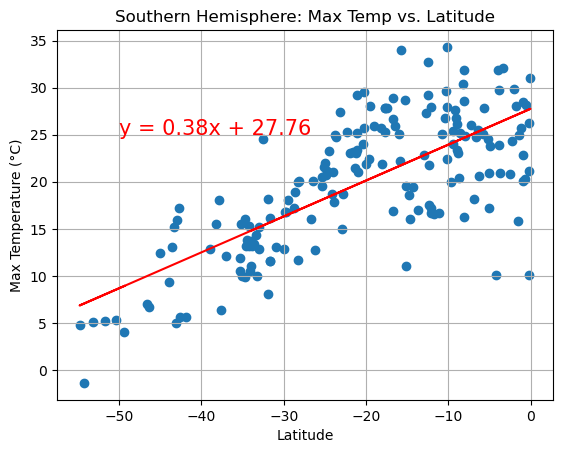

In [41]:
# Linear regression on Southern Hemisphere
# Perform linear regression on Temperature vs Latitude for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Get the linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot scatter and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Add labels, title, and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
plt.grid()

# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")

# Show the plot
plt.show()


The r^2-value is: 0.6720220238897325


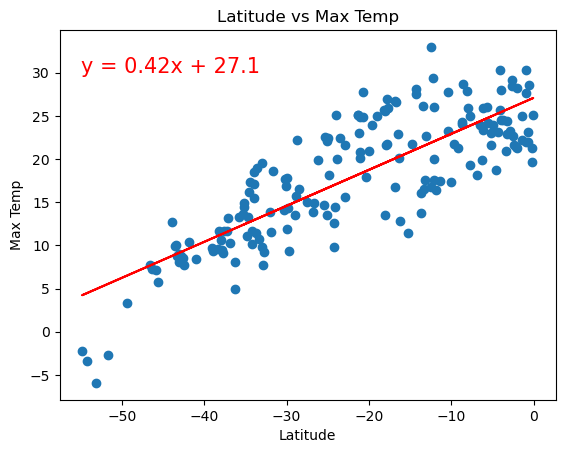

In [16]:
# please note i am keeping all orignal output and code cells from starter code to make it easier for me to compare
# # Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.00


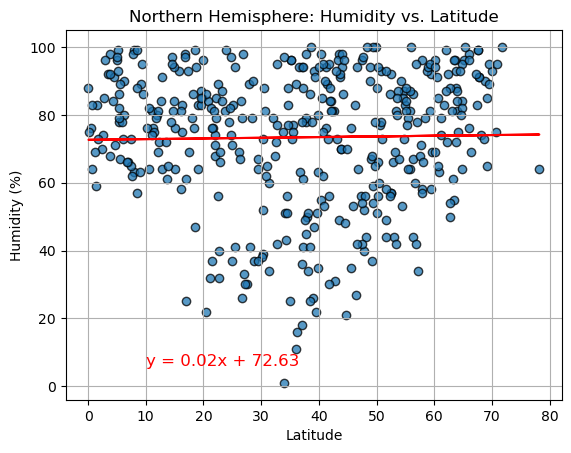

In [42]:
# Northern Hemisphere: Humidity vs. Latitude Regression Plot

# Select the relevant columns for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Annotate with the linear equation
plt.annotate(line_eq, (min(x_values)+10, min(y_values)+5), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.grid(True)

# Display R-squared value
print(f"The r-squared value is: {rvalue**2:.2f}")

# Save the figure
plt.savefig("output_data/NH_Humidity_vs_Latitude.png")

# Show plot
plt.show()


The r^2-value is: 0.007659599322853922


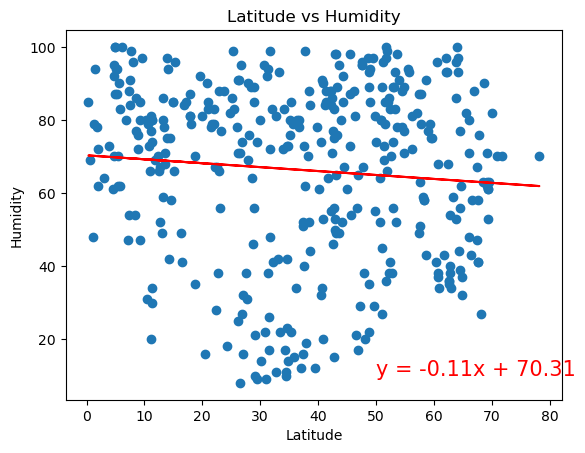

In [17]:
# Northern Hemisphere  
# YOUR CODE HERE

The r-squared value is: 0.00


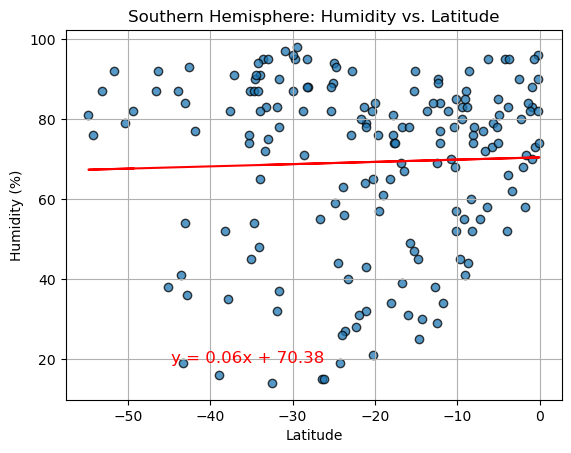

In [43]:
# Southern Hemisphere: Humidity vs. Latitude Regression Plot

# Select the relevant columns for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Annotate with the linear equation
plt.annotate(line_eq, (min(x_values)+10, min(y_values)+5), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.grid(True)

# Display R-squared value
print(f"The r-squared value is: {rvalue**2:.2f}")

# Save the figure
plt.savefig("output_data/SH_Humidity_vs_Latitude.png")

# Show plot
plt.show()


The r^2-value is: 0.00014367159540169783


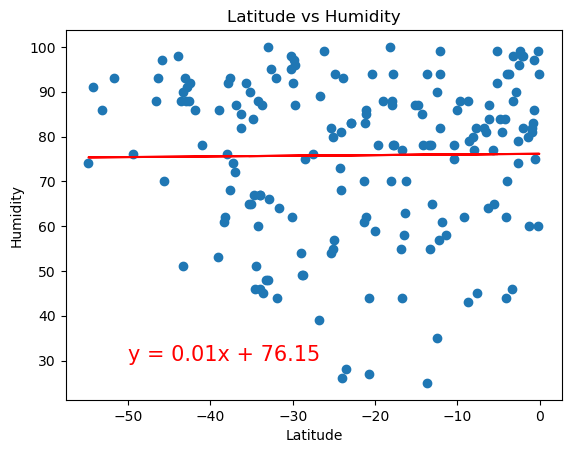

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.00


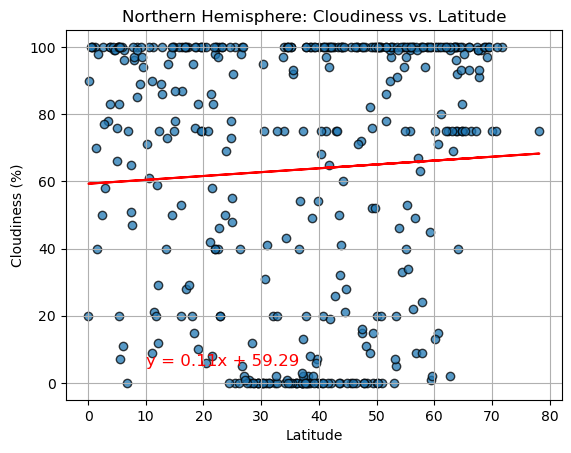

In [44]:
# Northern Hemisphere: Cloudiness vs. Latitude Regression Plot

# Select the relevant columns for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Annotate with the linear equation
plt.annotate(line_eq, (min(x_values)+10, min(y_values)+5), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.grid(True)

# Display R-squared value
print(f"The r-squared value is: {rvalue**2:.2f}")

# Save the figure
plt.savefig("output_data/NH_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


The r^2-value is: 0.006456908379763574


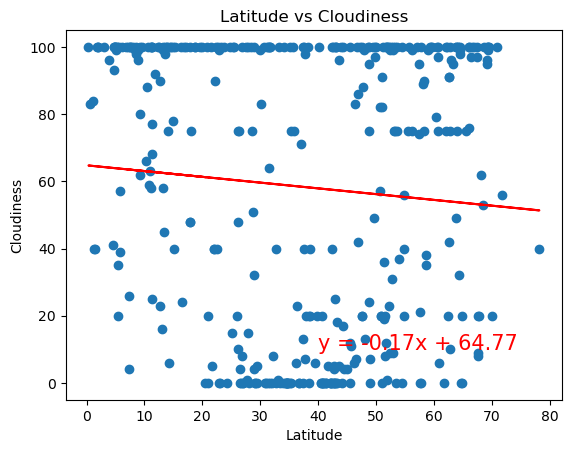

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-squared value is: 0.00


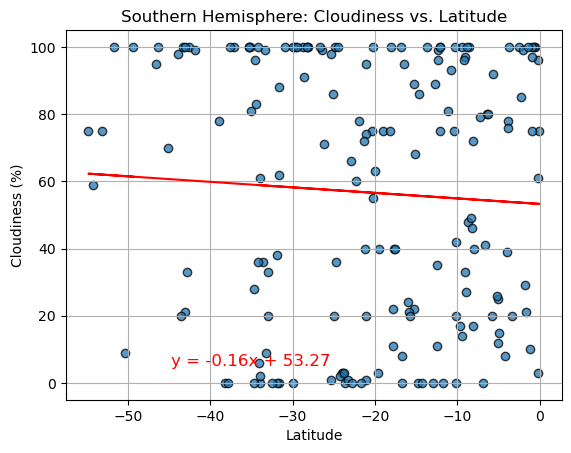

In [45]:
# Southern Hemisphere: Cloudiness vs. Latitude Regression Plot

# Select the relevant columns for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Annotate with the linear equation
plt.annotate(line_eq, (min(x_values)+10, min(y_values)+5), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.grid(True)

# Display R-squared value
print(f"The r-squared value is: {rvalue**2:.2f}")

# Save the figure
plt.savefig("output_data/SH_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


The r^2-value is: 0.018616831531634456


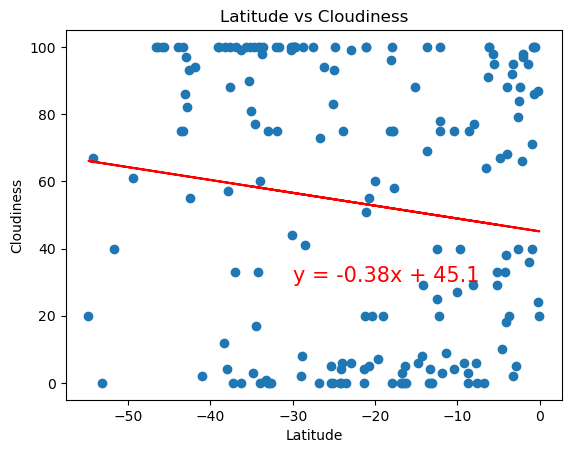

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.01


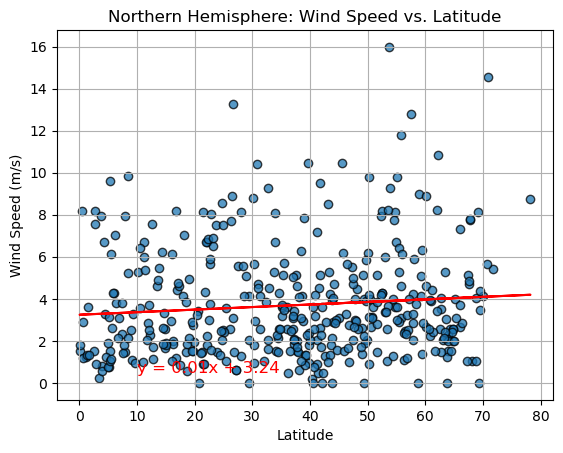

In [47]:
# Northern Hemisphere: Wind Speed vs. Latitude Regression Plot

# Select the relevant columns for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Annotate with the linear equation
plt.annotate(line_eq, (min(x_values)+10, min(y_values)+0.5), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.grid(True)

# Display R-squared value
print(f"The r-squared value is: {rvalue**2:.2f}")

# Save the figure
plt.savefig("output_data/NH_WindSpeed_vs_Latitude.png")

# Show plot
plt.show()


The r^2-value is: 0.0017236249523139959


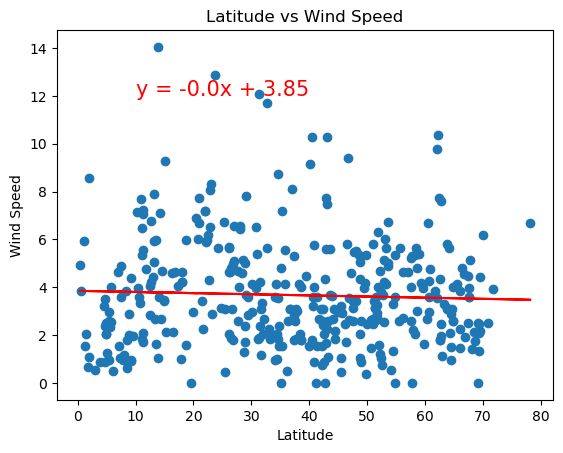

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-squared value is: 0.06


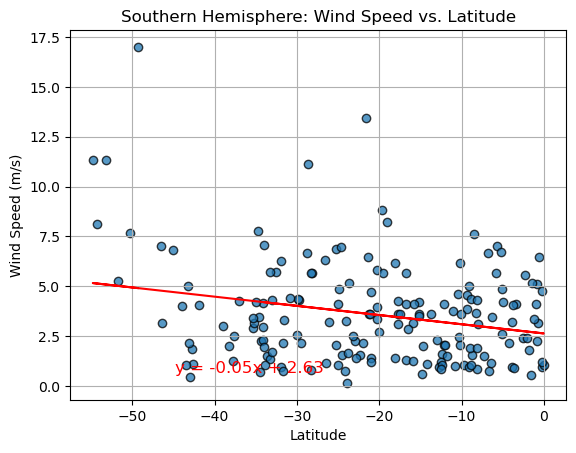

In [48]:
# Southern Hemisphere: Wind Speed vs. Latitude Regression Plot

# Select the relevant columns for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Annotate with the linear equation
plt.annotate(line_eq, (min(x_values)+10, min(y_values)+0.5), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.grid(True)

# Display R-squared value
print(f"The r-squared value is: {rvalue**2:.2f}")

# Save the figure
plt.savefig("output_data/SH_WindSpeed_vs_Latitude.png")

# Show plot
plt.show()


The r^2-value is: 0.06495869418886388


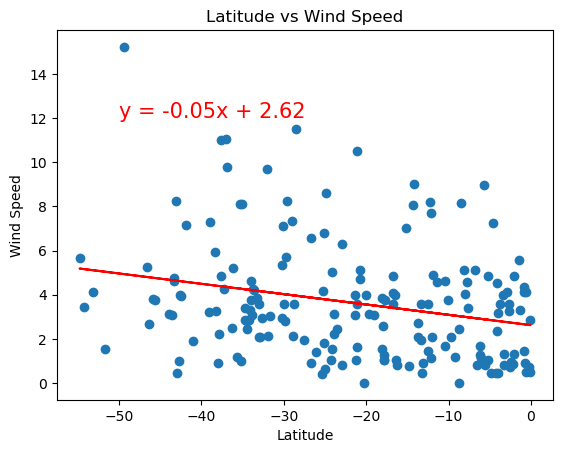

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The scatterplots and linear regression analysis for latitude vs. temperature, humidity, cloudiness, and wind speed show varying degrees of correlation.

# Temperature vs. Latitude:
# There is a noticeable linear relationship between latitude and temperature in both hemispheres. 
# In the Northern Hemisphere, as the latitude increases (moving away from the equator), the temperature decreases. 
# In the Southern Hemisphere, the temperature increases as you move closer to the equator. The R-squared values are significant for both, indicating a stronger correlation between temperature and latitude.

# Humidity vs. Latitude:
# The scatter plots for humidity vs. latitude show little to no strong linear correlation in either hemisphere, as evidenced by very low R-squared values close to zero. 
# This suggests that latitude is not a major determining factor for humidity in both hemispheres.

# Cloudiness vs. Latitude:
# Similar to humidity, the relationship between cloudiness and latitude does not exhibit a strong linear correlation in either hemisphere. 
# The R-squared values are quite low, indicating no meaningful pattern between cloud cover and latitude.

# Wind Speed vs. Latitude:
# The linear regression analysis for wind speed vs. latitude also shows weak correlations in both hemispheres. 
# The R-squared values are low, meaning that wind speed is not strongly dependent on latitude.

# Overall Conclusion:
# Temperature has the strongest linear relationship with latitude, while humidity, cloudiness, and wind speed show weak or no linear correlations with latitude.
